In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/sample_data/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# copy dataset
df1=df.copy()

In [5]:
# shape of the data
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check is there any null value present in  given columns
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Check is there any duplicate value present in  given columns
df.duplicated().sum()

0

In [9]:
# find count of every column
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [10]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [11]:
# size of dataset
df.size

6912

In [12]:
# Statistical information of data
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [13]:
# Check no of diabetic and non diabetic
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 -> Not Diabetic

1 -> Diabetic

In [14]:
# Calculate mean of every column based on outcome column
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

->> Find The Count Of Zero Value

In [15]:
# Find no of zeros in every column
a=[]
for i in df.columns :
  a.append(df[df[i]==0].shape[0])
print(pd.Series(a,index=df.columns))



Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [16]:
# Replace Zero of Column Glucose and BMI with mean of their respective column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


In [17]:
# Import KNN Imputor for imputing zero values
from sklearn.impute import KNNImputer

In [18]:
# Select column with 0 value
columns_with_zeros = ['Insulin','SkinThickness','BloodPressure']

#  replace zero woth nan
df[columns_with_zeros]=df[columns_with_zeros].replace(0,float('NaN'))

# Perform KNNimputaion
KNN=KNNImputer()
df_imputete=pd.DataFrame(KNN.fit_transform(df[columns_with_zeros]),columns=columns_with_zeros)


# CUpdate the original DataFrame with the imputed values
df[columns_with_zeros] = df_imputete.astype('int64')


print(df[columns_with_zeros])


     Insulin  SkinThickness  BloodPressure
0        250             35             72
1        148             29             66
2        163             30             64
3         94             23             66
4        168             35             40
..       ...            ...            ...
763      180             48             76
764      128             27             70
765      112             23             72
766      108             24             60
767       91             31             70

[768 rows x 3 columns]


In [19]:
# comparing values before and after imputation
pd.DataFrame(data=[df1.mean(),df.mean()],index=["Before imputaion","After imputaion"])

Pregnancies     Glucose  BloodPressure  SkinThickness  \
Before imputaion     3.845052  120.894531      69.105469      20.536458   
After imputaion      3.845052  121.681605      72.365885      29.476562   

                     Insulin        BMI  DiabetesPedigreeFunction        Age  \
Before imputaion   79.799479  31.992578                  0.471876  33.240885   
After imputaion   158.928385  32.450805                  0.471876  33.240885   

                   Outcome  
Before imputaion  0.348958  
After imputaion   0.348958

NOW MY DATA SET CLEANED


Exporatory Data Analysis (EDA)

Text(0.5, 1.0, 'Outcome Distribution')

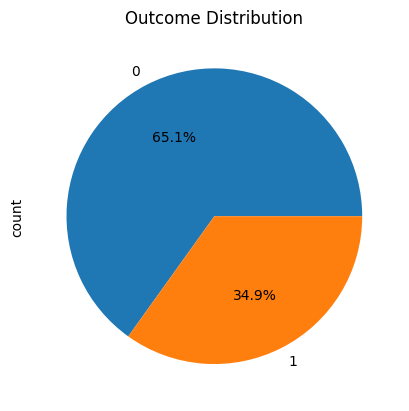

In [20]:
# Pie Chart of outcome column
df['Outcome'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Outcome Distribution')

###Observation
Percentage of

a) Non Diabetic Patient : 65.1 %

b) Diabetic Patient : 34.9 %



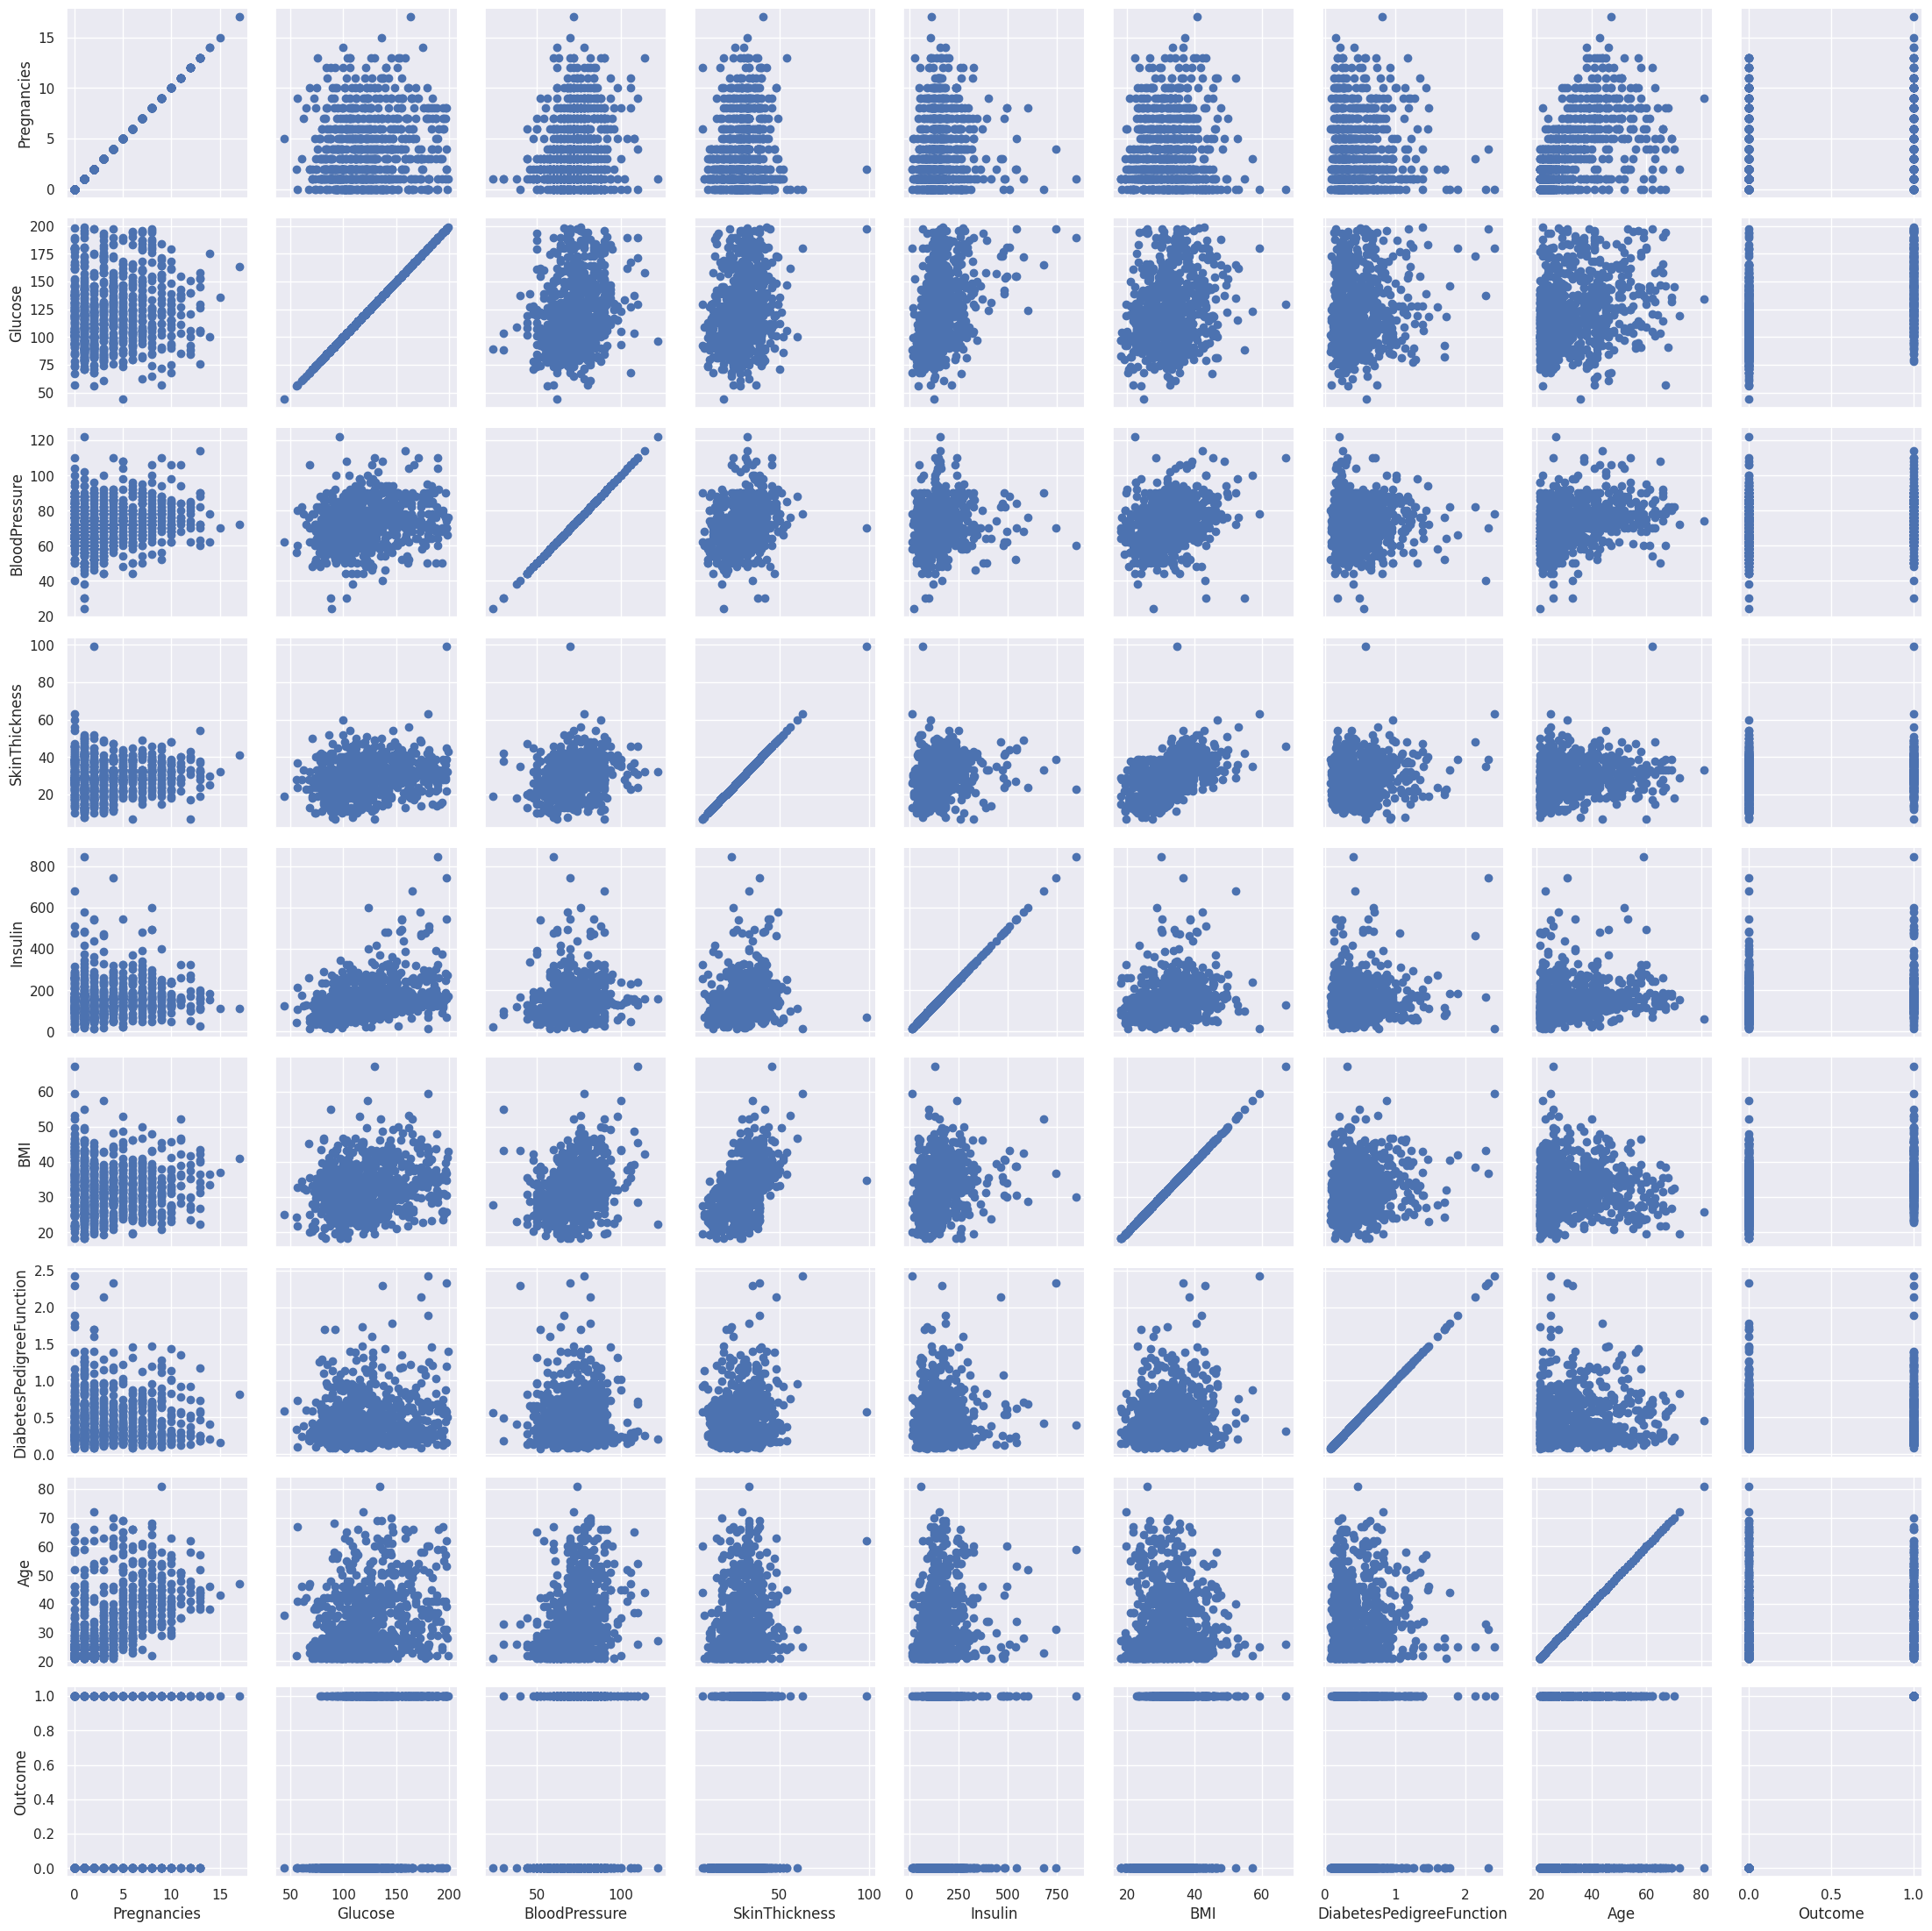

In [21]:
#sacatter plot
sns.set(style='darkgrid')
columns=sns.PairGrid(df)
columns.map(plt.scatter)

 Here we analysis of scatter plot help to understand,


 1-> The different type of correlation among the data point , Which useful to understand the relation whithin the data ,

 2-> A Line of best fit can be drawn for the given data for using prediction new data values in further analysis

 3-> We can find easily outliers



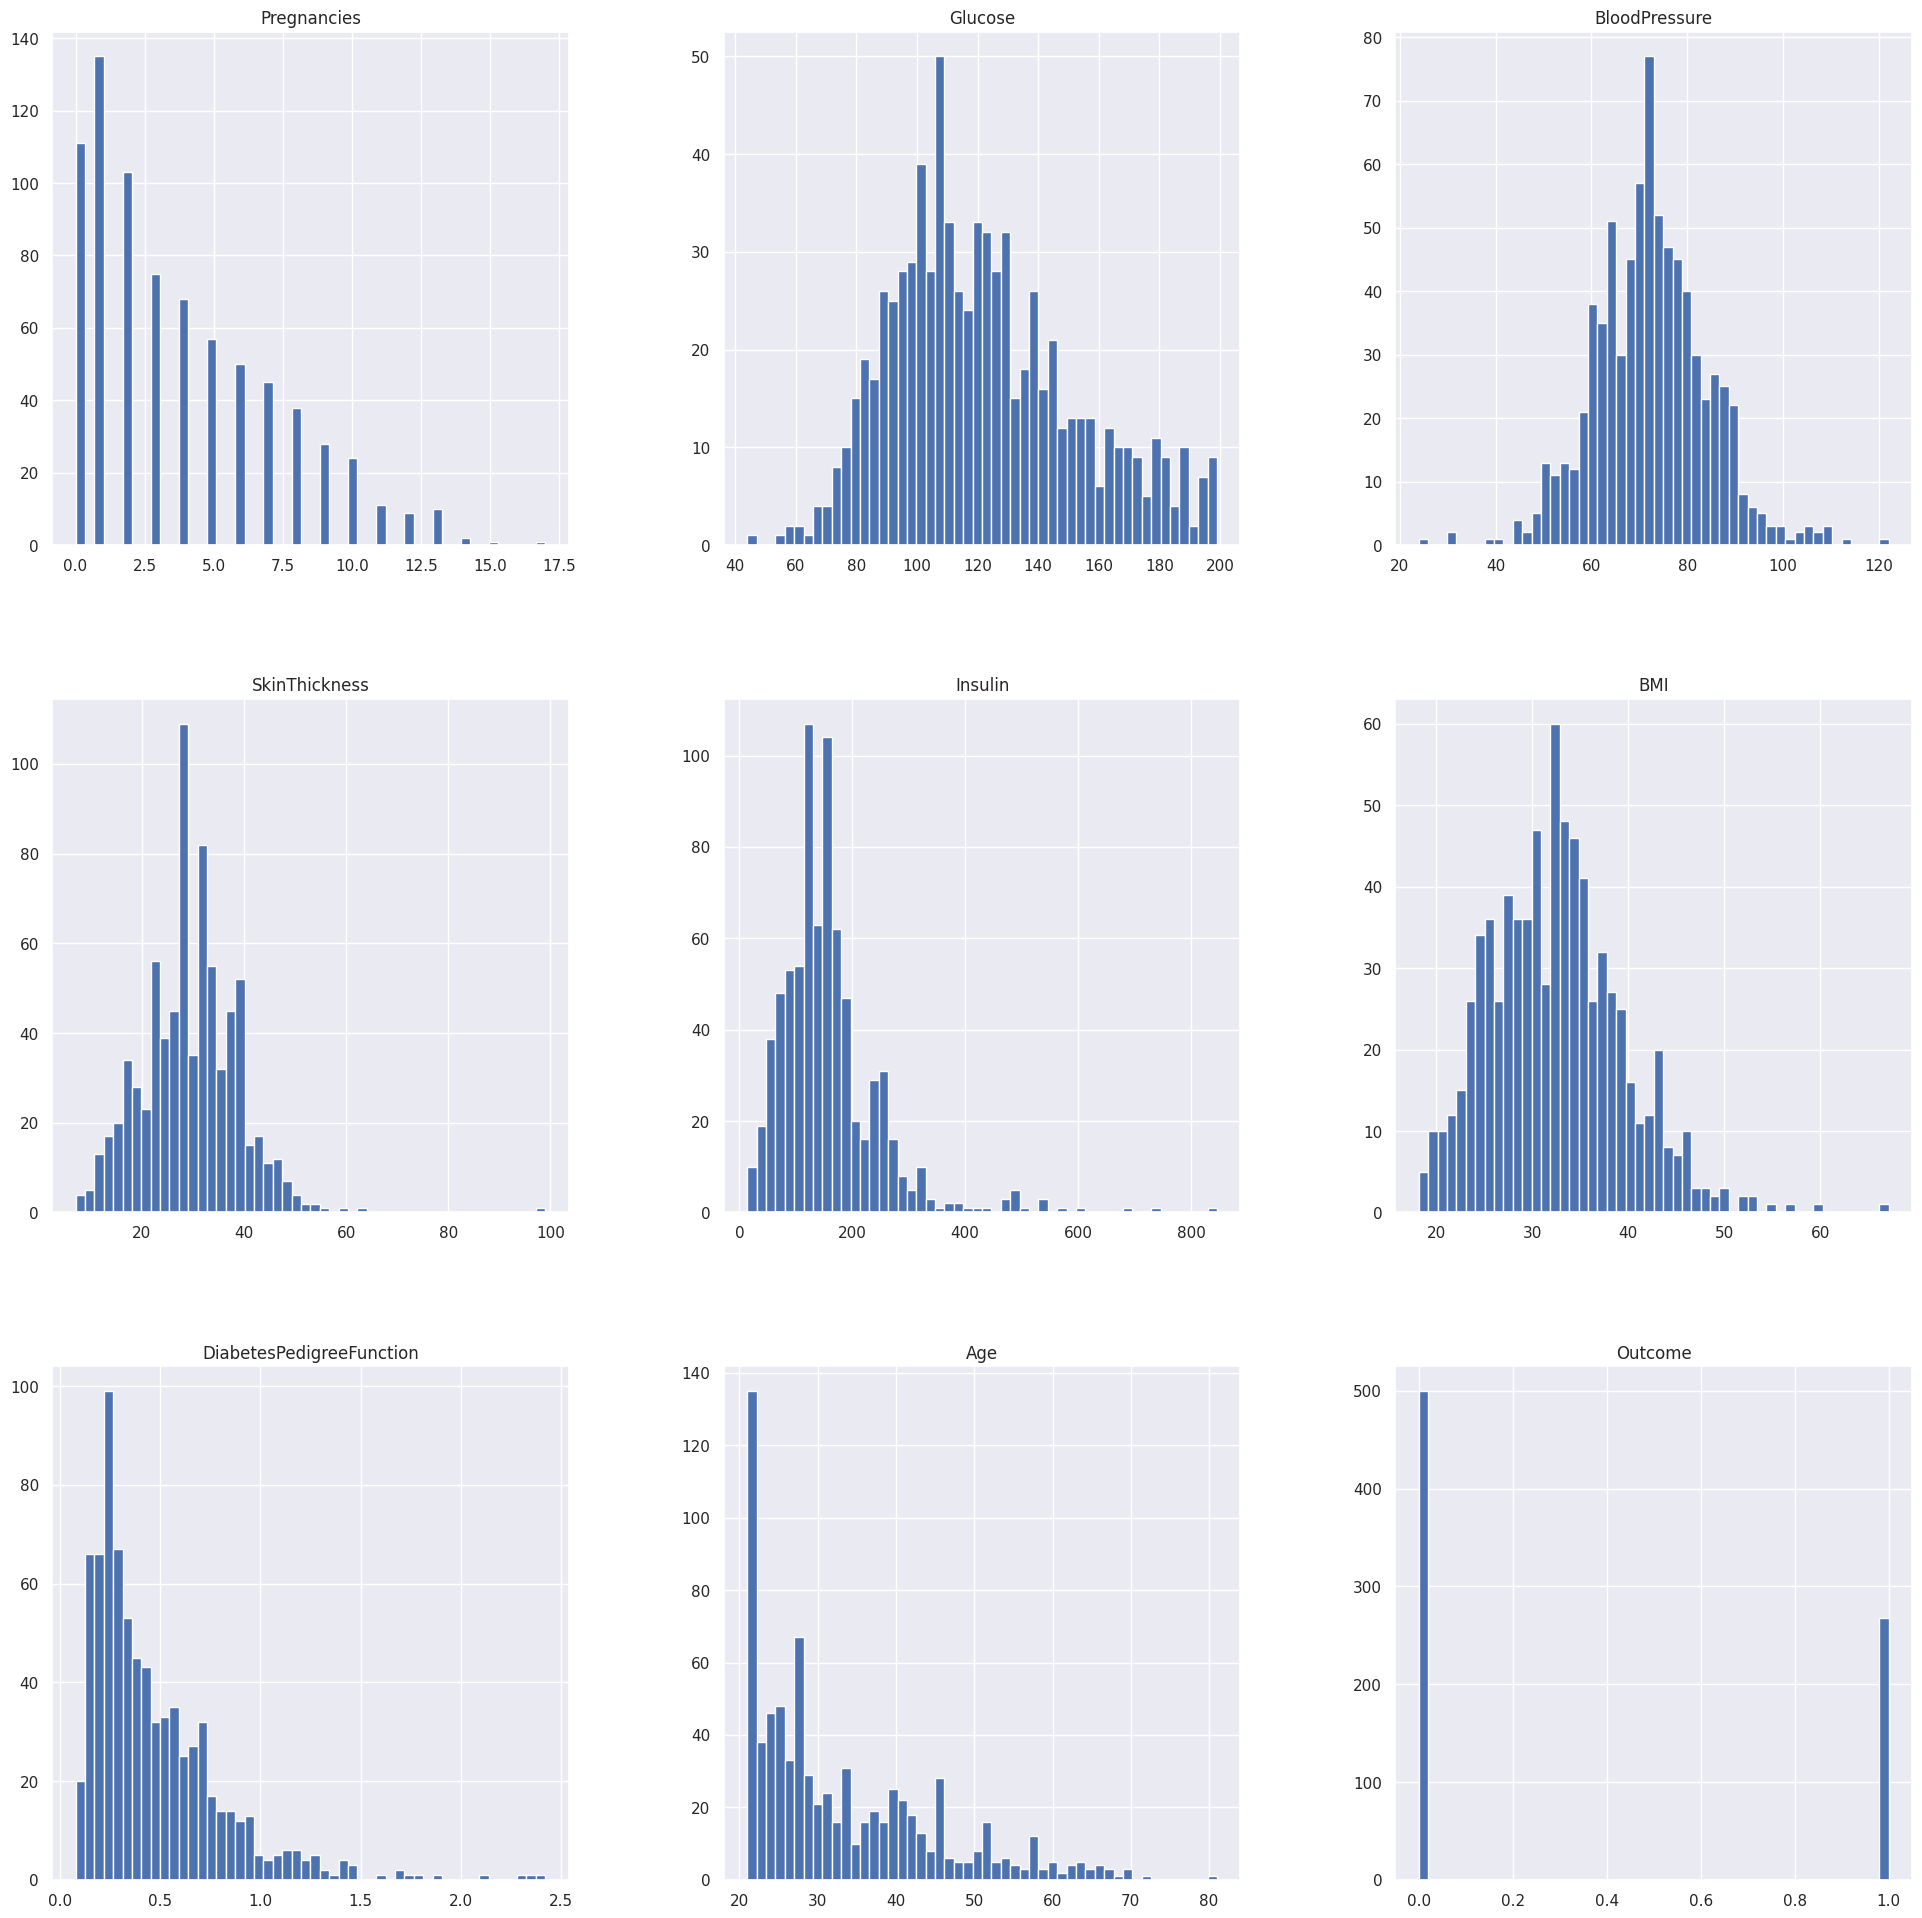

In [22]:
# Histogram for all attributes to analyze the distribution of each attribute

df.hist(bins=50,figsize=(24,24))
plt.show()

Here we  can be used to visualize the distribution of data,

Pregnancies, Insulin, Age and DiabetesPedigreeFunction columns are right skewed




BloodPressure, Glucose, SkinThickness and BMI columns are normally distributed

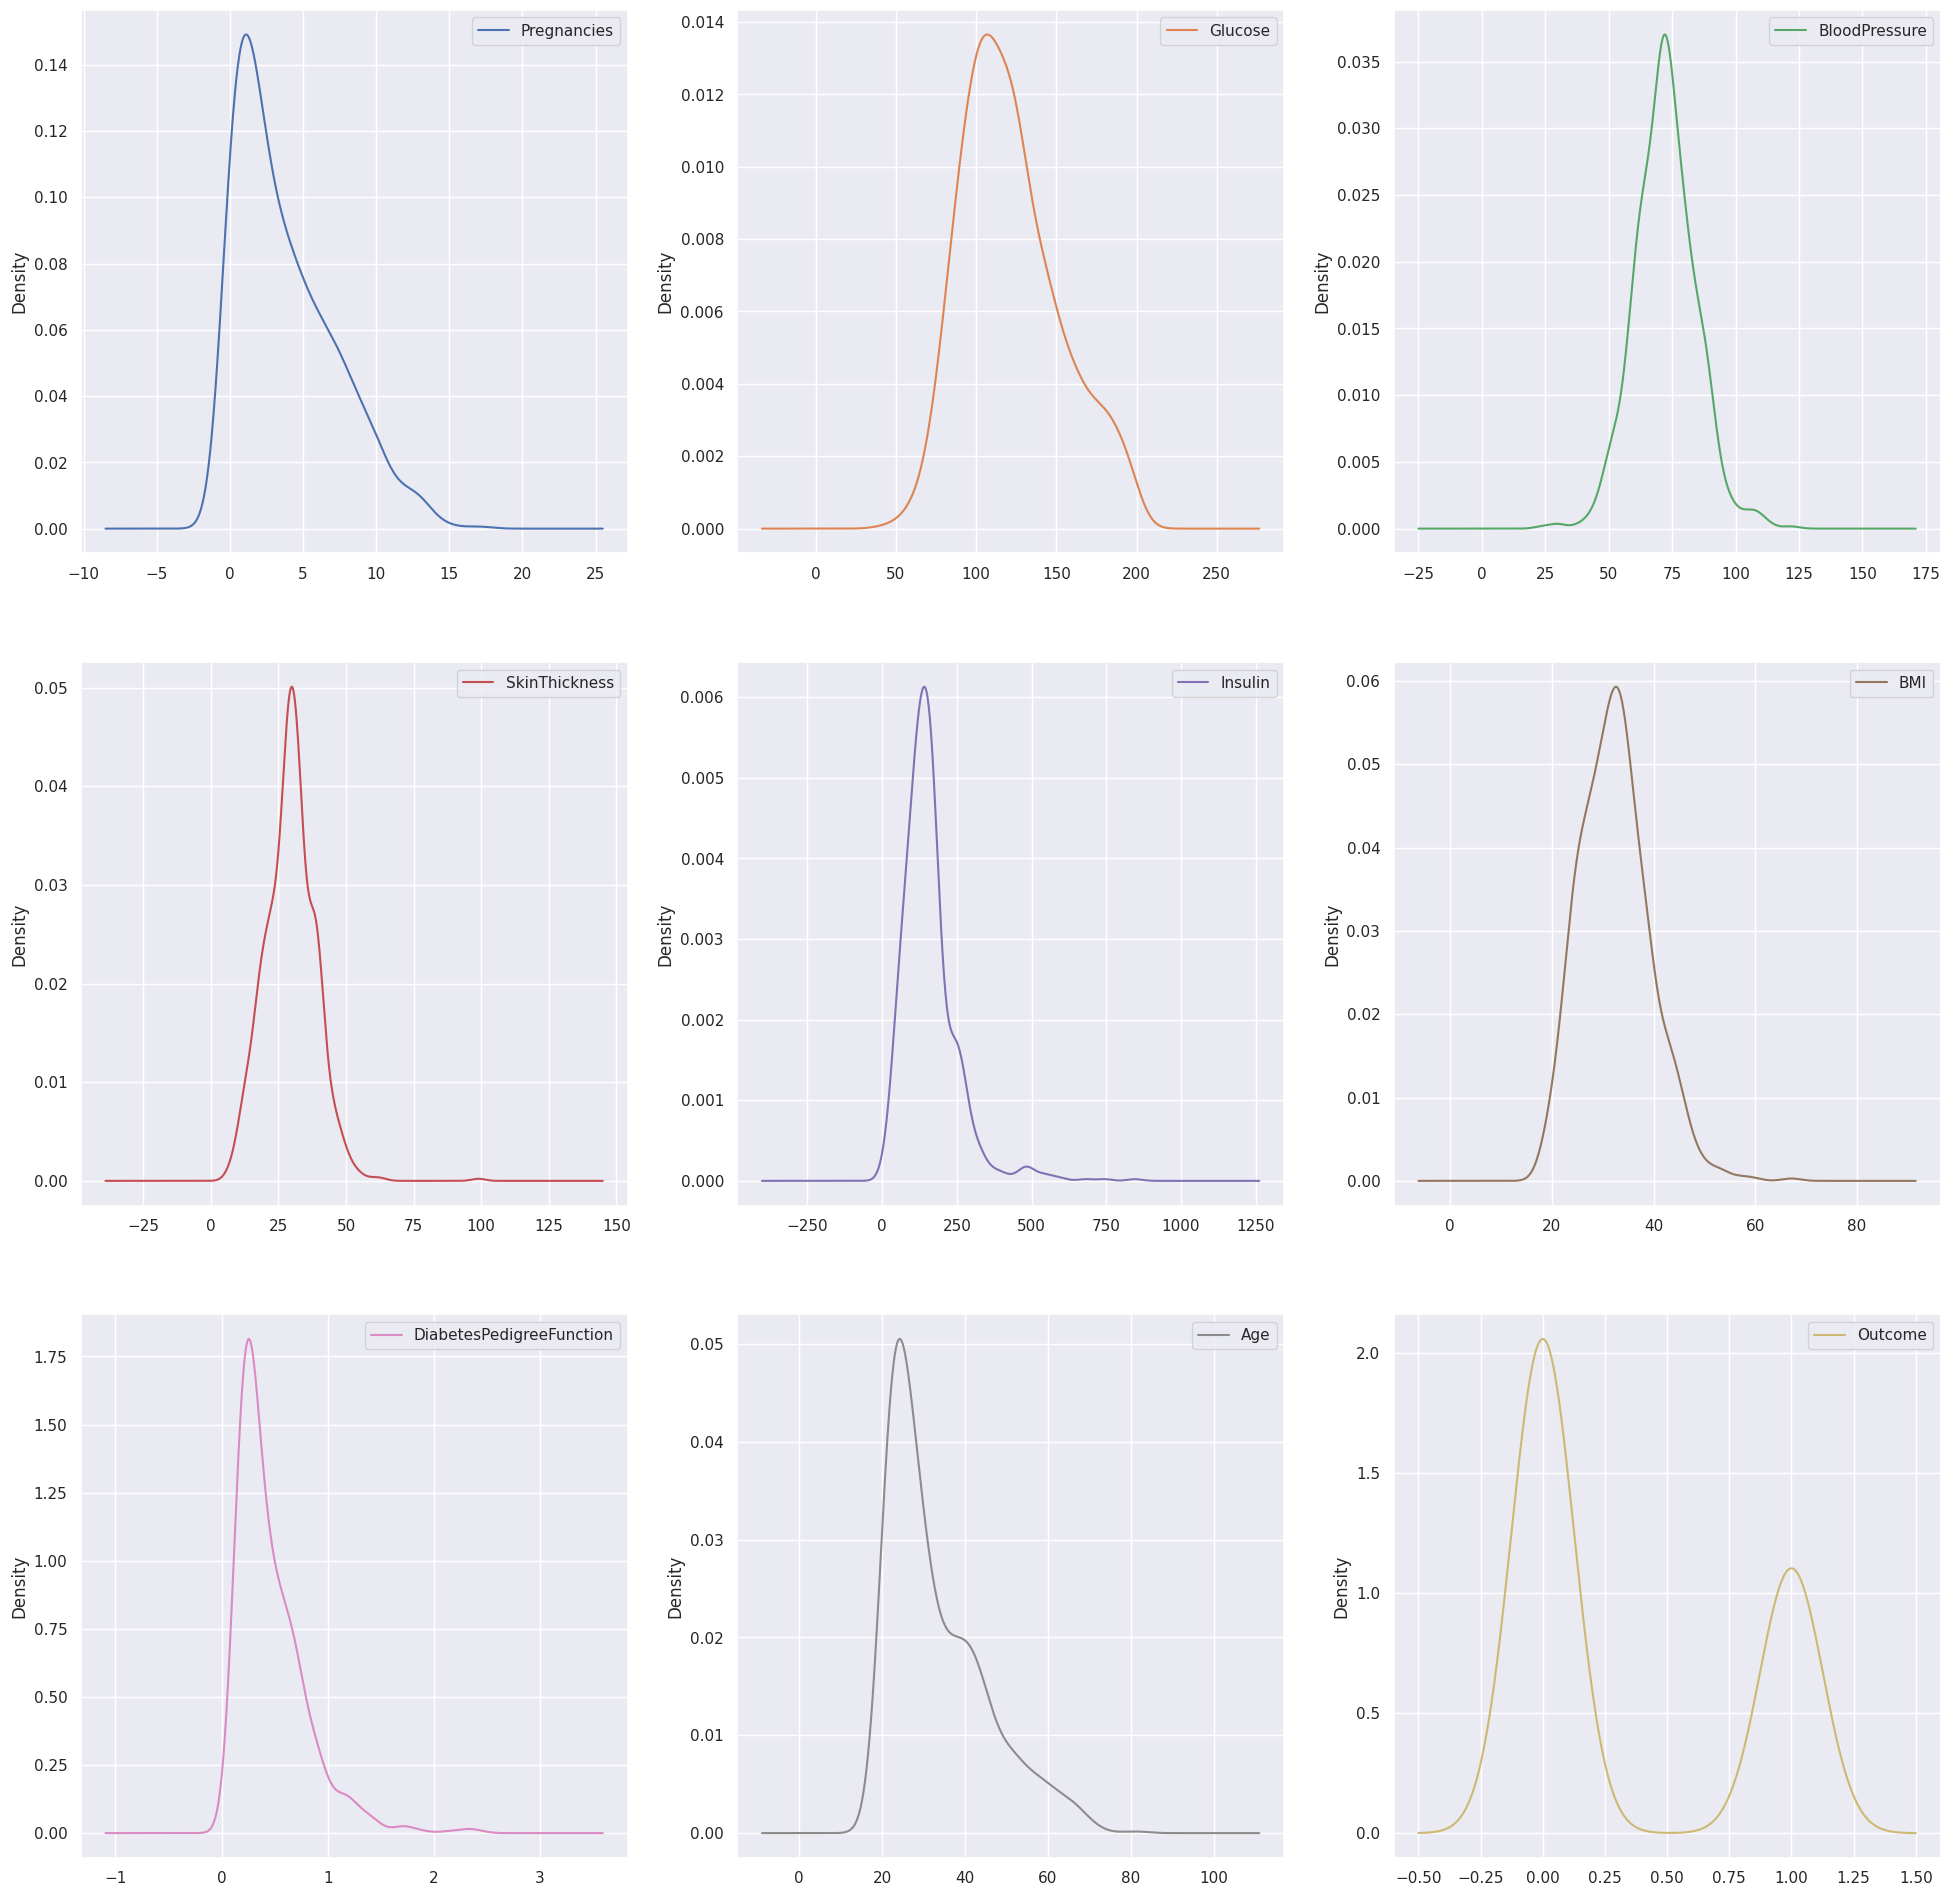

In [23]:
## Density plot for all attributes to visualize the distribution of each attribute

df.plot(kind=('density'),subplots=True,layout=(3,3),figsize=(24,24),sharex=False)
plt.show()

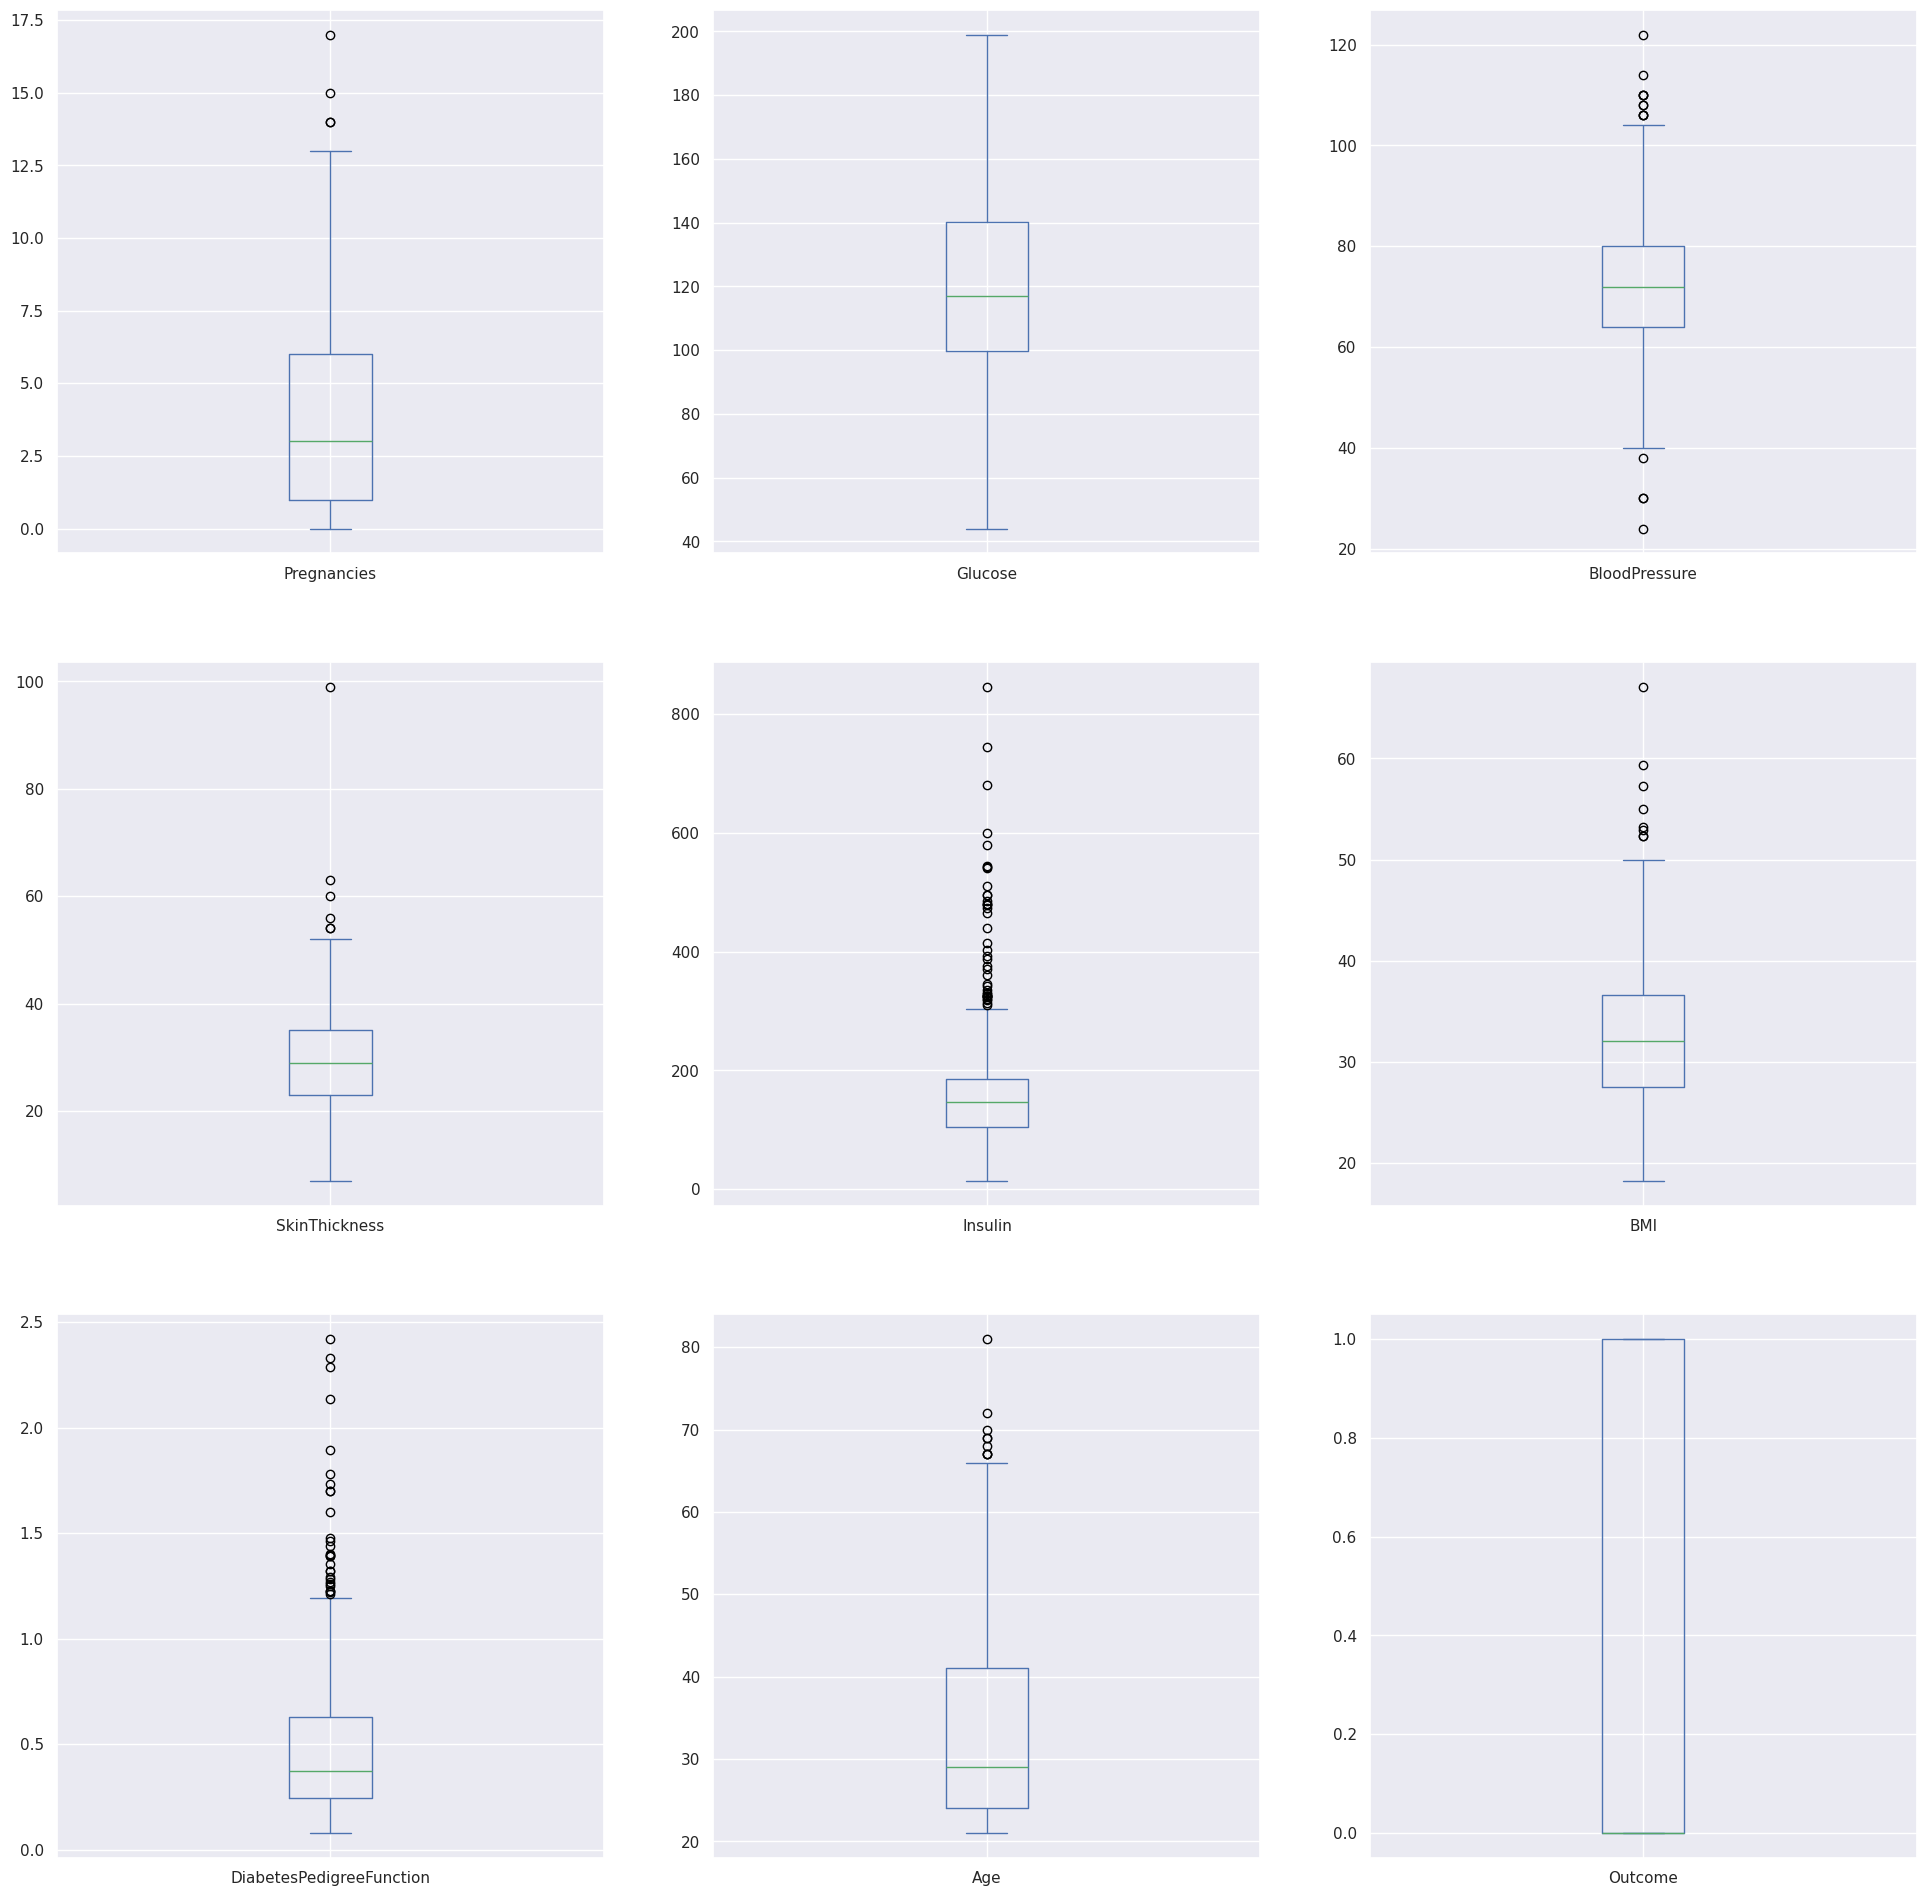

In [24]:
# Box plot to visualize the distribution of all atributes
df.plot(kind='box',layout=(3,3),subplots=True,figsize=(24,24))
plt.show()

Observation :

After conducting a thorough visual analysis of the box plots, I observed that, with the exception of the Glucose column and the target variable Outcome, all other columns in the dataset exhibit the presence of outliers.

But some of these outliers are valid and reflect genuine extreme values within the data, others appear to be invalid within the context of dataset.



In [25]:
# remove outliers of BloodPressure using Inquartile method


# Find 25th percentile
percentile25 = df['BloodPressure'].quantile(0.25)

# Find 75th percentile
percentile75 = df['BloodPressure'].quantile(0.75)

# Inquartile range
iqr=percentile75-percentile25

# Find upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)


Upper limit 104.0
Lower limit 40.0


In [26]:
# Outlier columns
df[df['BloodPressure'] > upper_limit]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
43             9    171.0            110             24      240  45.4   
84             5    137.0            108             32      158  48.8   
106            1     96.0            122             32      158  22.4   
177            0    129.0            110             46      130  67.1   
362            5    103.0            108             37      146  39.2   
549            4    189.0            110             31      148  28.5   
658           11    127.0            106             35      158  39.0   
662            8    167.0            106             46      231  37.6   
672           10     68.0            106             23       49  35.5   
691           13    158.0            114             32      158  42.3   

     DiabetesPedigreeFunction  Age  Outcome  
43                      0.721   54        1  
84                      0.227   37        1  
106                     0.207   27        0  
177                     0.319   26        1  
362                     0.305   65        0  
549                     0.680   37        0  
658                     0.190   51        0  
662                     0.165   43        1  
672                     0.285   47        0  
691                     0.257   44        1

In [27]:
# Outlier columns
df[df['BloodPressure'] < lower_limit]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1    103.0             30             38       83  43.3   
125            1     88.0             30             42       99  55.0   
597            1     89.0             24             19       25  27.8   
599            1    109.0             38             18      120  23.1   

     DiabetesPedigreeFunction  Age  Outcome  
18                      0.183   33        0  
125                     0.496   26        1  
597                     0.559   21        0  
599                     0.407   26        0

In [28]:
# triming
df=df[(df['BloodPressure'] >lower_limit) & (df['BloodPressure'] < upper_limit)]

In [29]:

# detect outliers of SkinThickness using normal distribution

# mean
mean=df["SkinThickness"].mean()

# standard devation
std=df["SkinThickness"].std()

# find upper and lower limit

upper_limit=mean+(3*std)
lower_limit=mean-(3*std)
print("upper limit is :",upper_limit)
print("lower limit is :",lower_limit)

upper limit is : 57.25198165678471
lower limit is : 1.581573602869085


In [30]:
# Outlier columns
df[df['SkinThickness'] > upper_limit]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
57             0    100.0             88             60      110  46.8   
445            0    180.0             78             63       14  59.4   
579            2    197.0             70             99       69  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
57                      0.962   31        0  
445                     2.420   25        1  
579                     0.575   62        1

In [31]:
# Trimming
df=df[df['SkinThickness'] < upper_limit]
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0             72             35      250  33.6   
1              1     85.0             66             29      148  26.6   
2              8    183.0             64             30      163  23.3   
3              1     89.0             66             23       94  28.1   
5              5    116.0             74             22      159  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0             76             48      180  32.9   
764            2    122.0             70             27      128  36.8   
765            5    121.0             72             23      112  26.2   
766            1    126.0             60             24      108  30.1   
767            1     93.0             70             31       91  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[748 rows x 9 columns]

Observation:

In particular, I identified and removed the invalid outliers present in the SkinThickness and BloodPressure columns with the help of trimming. For instance, a SkinThickness value greater than or equal to 57.25 and a BloodPressure value less than 40 are not possible

In [32]:
# detect outliers of Insulin using Inquartile method

# Find 25th percentile
percentile25 = df['Insulin'].quantile(0.25)

# Find 75th percentile
percentile75 = df['Insulin'].quantile(0.75)

# Inquartile range
iqr=percentile75-percentile25

# Find lower and upper limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)


Upper limit 310.0
Lower limit -18.0


In [33]:
#Outliers columns
df[df['Insulin']> upper_limit]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2    197.0             70             45      543  30.5   
13             1    189.0             60             23      846  30.1   
54             7    150.0             66             42      342  34.7   
111            8    155.0             62             26      495  34.0   
139            5    105.0             72             29      325  36.9   
153            1    153.0             82             42      485  40.6   
186            8    181.0             68             36      495  30.1   
199            4    148.0             60             27      318  30.9   
220            0    177.0             60             29      478  34.6   
228            4    197.0             70             39      744  36.7   
231            6    134.0             80             37      370  46.2   
247            0    165.0             90             33      680  52.3   
248            9    124.0             70             33      402  35.4   
258            1    193.0             50             16      375  25.9   
286            5    155.0             84             44      545  38.7   
296            2    146.0             70             38      360  28.0   
360            5    189.0             64             33      325  31.2   
370            3    173.0             82             48      465  38.4   
375           12    140.0             82             43      325  39.2   
392            1    131.0             64             14      415  23.7   
409            1    172.0             68             49      579  42.4   
415            3    173.0             84             33      474  35.7   
471            0    137.0             70             38      314  33.2   
480            3    158.0             70             30      328  35.5   
486            1    139.0             62             41      480  40.7   
519            6    129.0             90              7      326  19.6   
556            1     97.0             70             40      345  38.1   
558           11    103.0             68             40      323  46.2   
574            1    143.0             86             30      330  30.1   
584            8    124.0             76             24      600  28.7   
612            7    168.0             88             42      321  38.2   
645            2    157.0             74             35      440  39.4   
655            2    155.0             52             27      540  38.7   
695            7    142.0             90             24      480  30.4   
707            2    127.0             46             21      335  34.4   
710            3    158.0             64             13      387  31.2   
715            7    187.0             50             33      392  33.9   
753            0    181.0             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
8                       0.158   53        1  
13                      0.398   59        1  
54                      0.718   42        0  
111                     0.543   46        1  
139                     0.159   28        0  
153                     0.687   23        0  
186                     0.615   60        1  
199                     0.150   29        1  
220                     1.072   21        1  
228                     2.329   31        0  
231                     0.238   46        1  
247                     0.427   23        0  
248                     0.282   34        0  
258                     0.655   24        0  
286                     0.619   34        0  
296                     0.337   29        1  
360                     0.583   29        1  
370                     2.137   25        1  
375                     0.528   58        1  
392                     0.389   21        0  
409                     0.702   28        1  
415                     0.258   22        1  
471                     0.170   22        0  
480           

In [34]:
# Trimming
df=df[df['Insulin']<upper_limit]
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0             72             35      250  33.6   
1              1     85.0             66             29      148  26.6   
2              8    183.0             64             30      163  23.3   
3              1     89.0             66             23       94  28.1   
5              5    116.0             74             22      159  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0             76             48      180  32.9   
764            2    122.0             70             27      128  36.8   
765            5    121.0             72             23      112  26.2   
766            1    126.0             60             24      108  30.1   
767            1     93.0             70             31       91  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[709 rows x 9 columns]

we come again

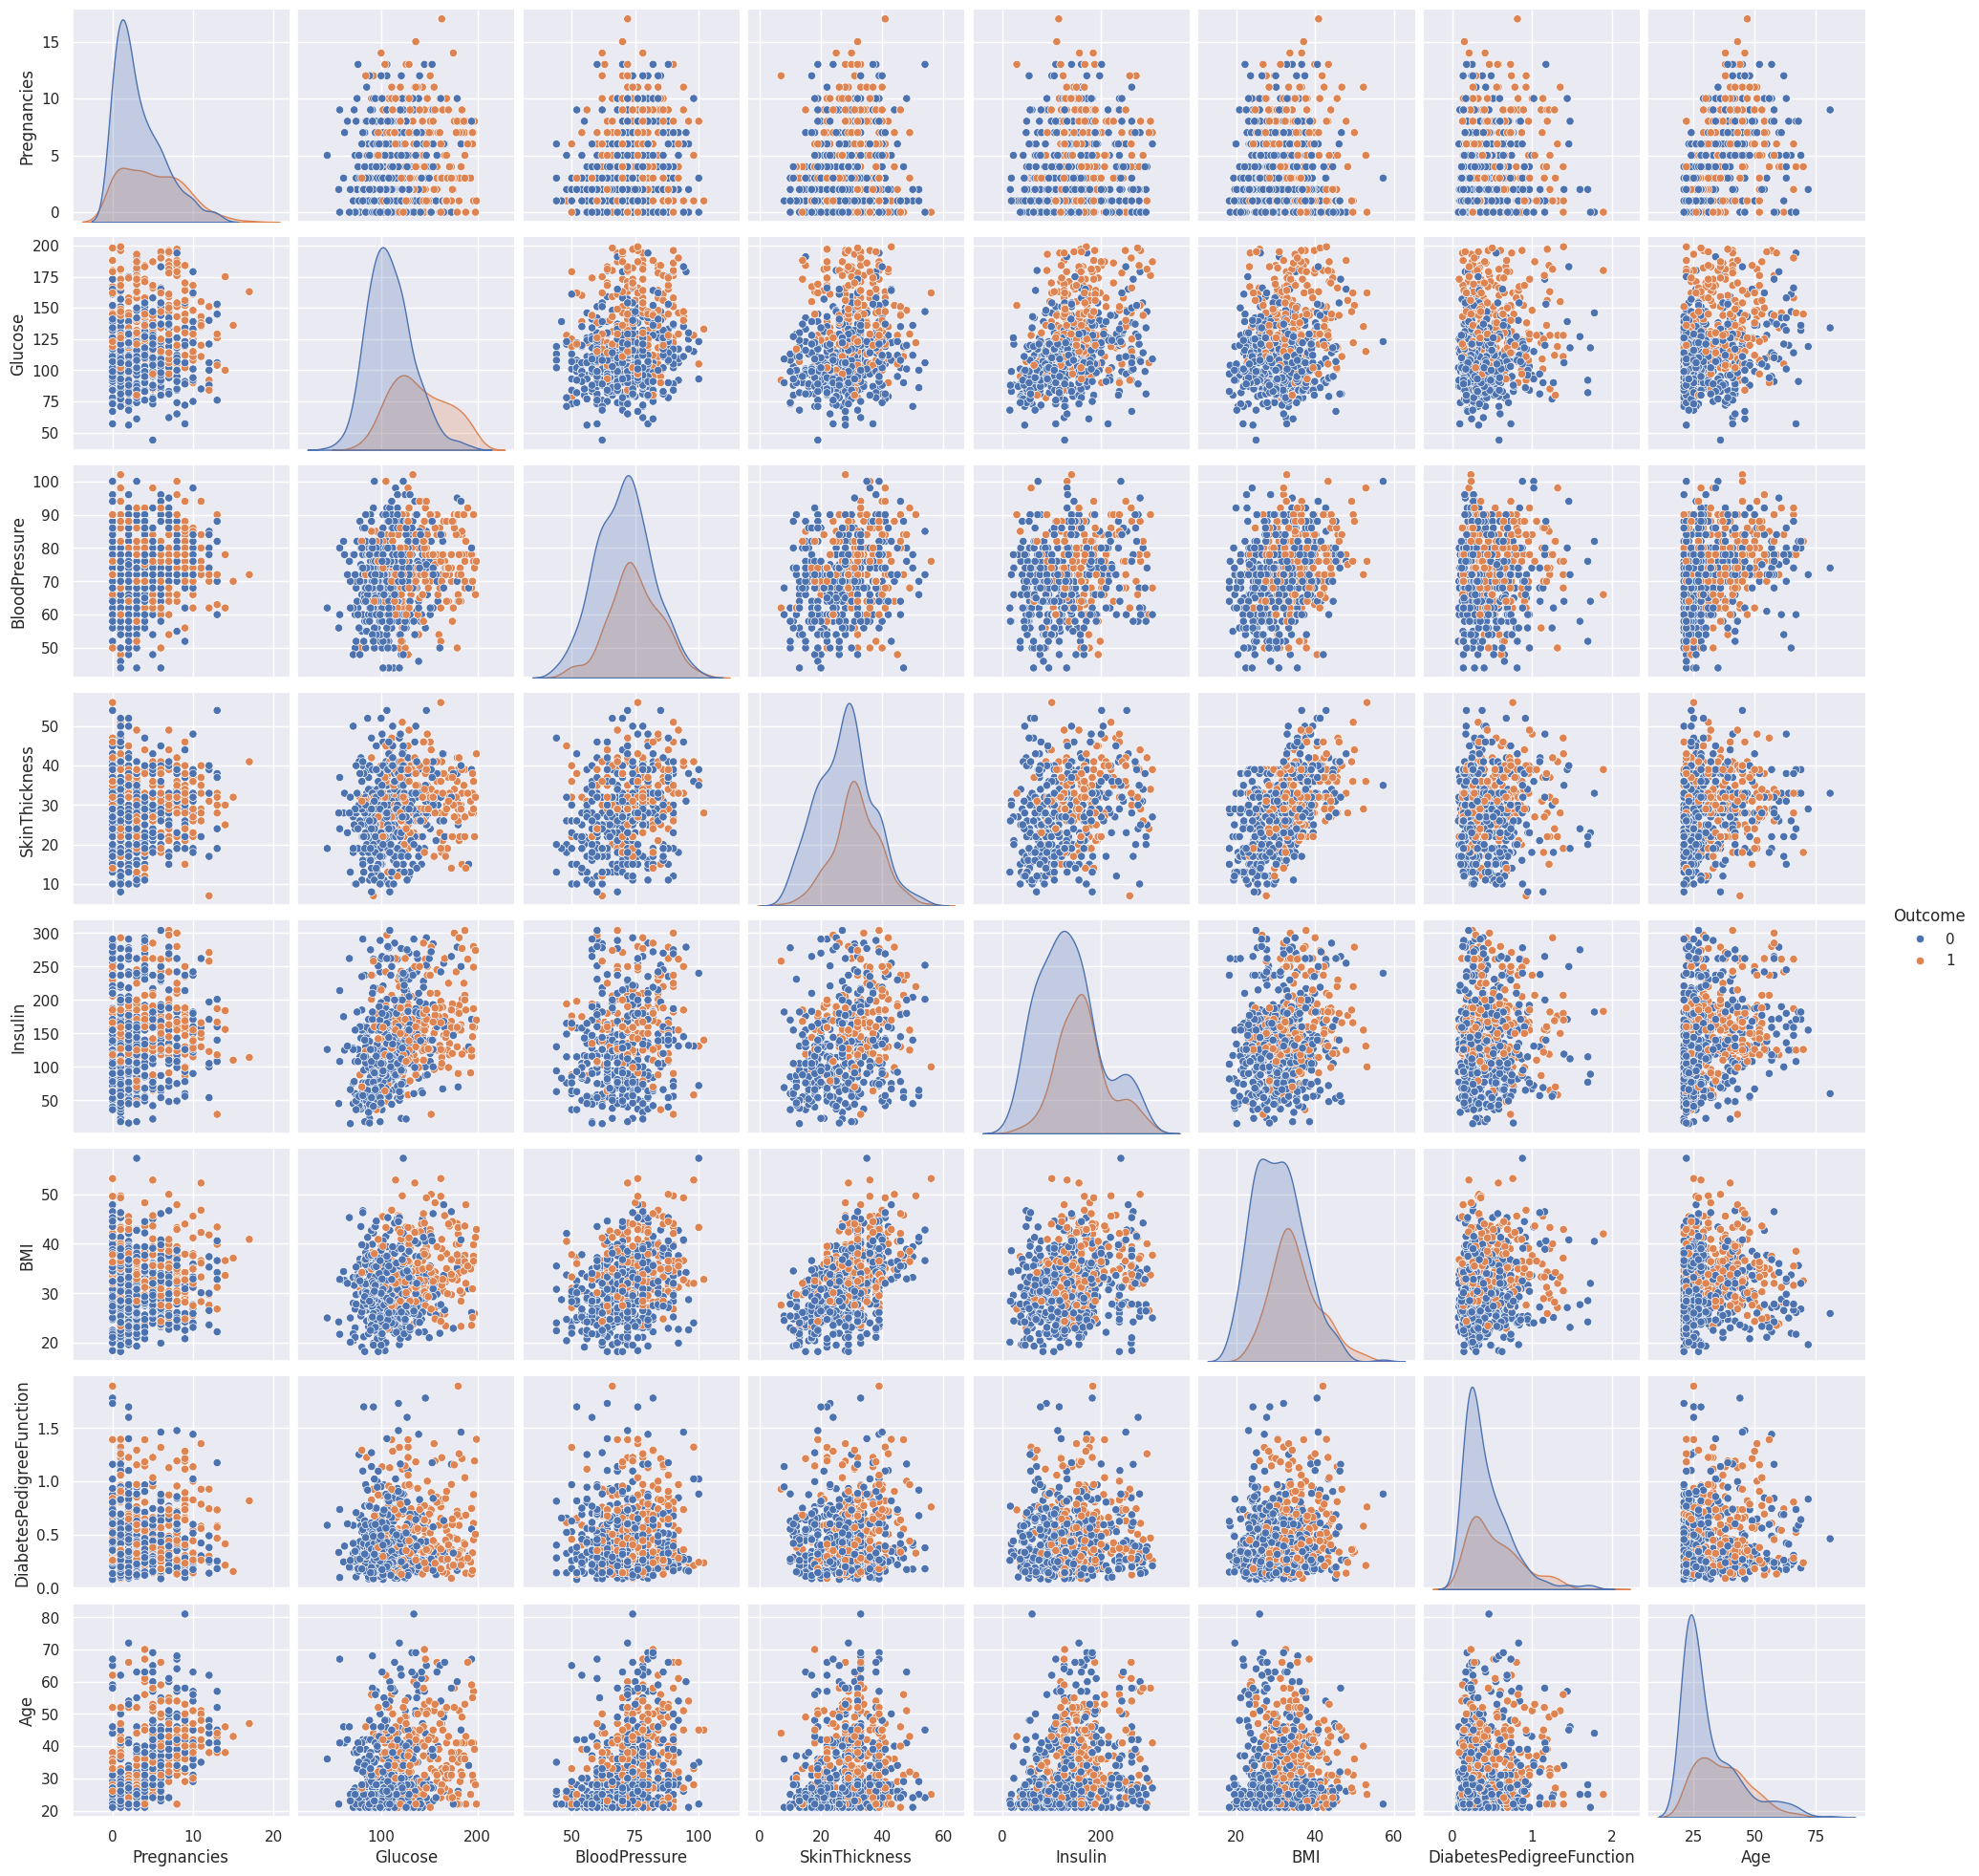

In [35]:
# Pairplot
sns.pairplot(df, hue='Outcome')
plt.show()

In [36]:
# correlation between data
correlation=df.corr()
correlation

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.152377       0.191962       0.141107   
Glucose                      0.152377  1.000000       0.235006       0.182886   
BloodPressure                0.191962  0.235006       1.000000       0.303217   
SkinThickness                0.141107  0.182886       0.303217       1.000000   
Insulin                      0.130353  0.353411       0.251429       0.261458   
BMI                          0.032640  0.225593       0.298073       0.535303   
DiabetesPedigreeFunction    -0.009046  0.096994       0.026293       0.069462   
Age                          0.539305  0.278067       0.328825       0.162090   
Outcome                      0.232560  0.486118       0.180621       0.202537   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.130353  0.032640                 -0.009046   
Glucose                   0.353411  0.225593                  0.096994   
BloodPressure             0.251429  0.298073                  0.026293   
SkinThickness             0.261458  0.535303                  0.069462   
Insulin                   1.000000  0.230514                  0.027742   
BMI                       0.230514  1.000000                  0.133340   
DiabetesPedigreeFunction  0.027742  0.133340                  1.000000   
Age                       0.229044  0.031639                  0.059970   
Outcome                   0.216153  0.309609                  0.179716   

                               Age   Outcome  
Pregnancies               0.539305  0.232560  
Glucose                   0.278067  0.486118  
BloodPressure             0.328825  0.180621  
SkinThickness             0.162090  0.202537  
Insulin                   0.229044  0.216153  
BMI                       0.031639  0.309609  
DiabetesPedigreeFunction  0.059970  0.179716  
Age                       1.000000  0.230370  
Outcome                   0.230370  1.000000

<Axes: >

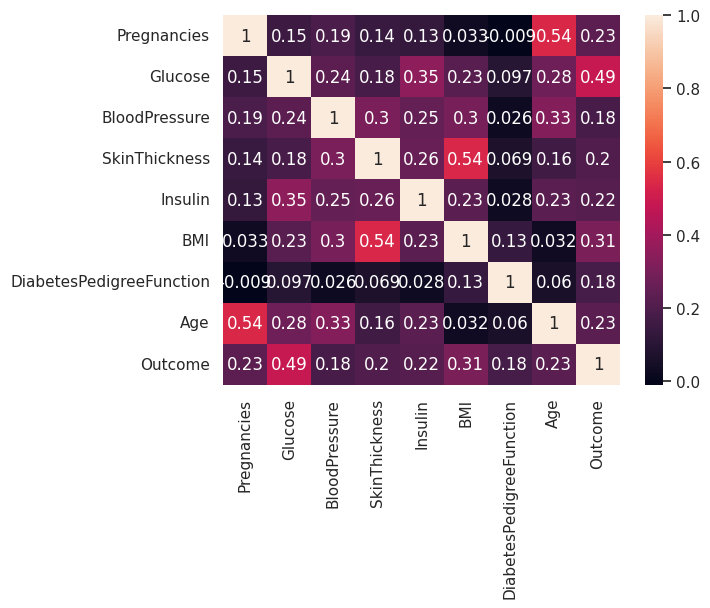

In [37]:
#Heat Map
sns.heatmap(correlation,annot=True)

There are no strong correlation between the features. The strongest ones are the following (as expected):

Age x pregnancies (0.55) - Older women tend to have higher number of pregnancies

Glucose x insulin (0.42)- Women that have higher level of glucose tend to have higher level of insulin

Skin fold thickness x BMI (0.54) - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

Glucose x outcome (0.49) - Women with higher glucose levels are more likely to have diabetes.

## Data standardization

In [38]:
#  Split Data
X=df.drop("Outcome",axis=1)
Y=df["Outcome"]


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
Sc=StandardScaler()
Standard_data=Sc.fit_transform(X)
print(Standard_data)


[[ 0.64283591  0.97140386 -0.00485289 ...  0.23496312  0.52875731
   1.45390251]
 [-0.84856023 -1.17931301 -0.56280432 ... -0.83351916 -0.36788078
  -0.17577969]
 [ 1.23939437  2.16624656 -0.74878812 ... -1.33723224  0.67494831
  -0.09000695]
 ...
 [ 0.34455668  0.04966806 -0.00485289 ... -0.89457529 -0.71224179
  -0.26155244]
 [-0.84856023  0.22035988 -1.12075574 ... -0.29927802 -0.37437816
   1.19658427]
 [-0.84856023 -0.9062061  -0.1908367  ... -0.25348593 -0.48483358
  -0.86196167]]


In [41]:
X=Standard_data
Y=df['Outcome']

#  Train Test Split

In [42]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [43]:
print(X.shape,x_train.shape,x_test.shape)

(709, 8) (567, 8) (142, 8)


##Training the Model using Support Vector Machine (SVM) Method


1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [44]:
#svm grid hyper parameter
svm_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

2. Fetching the Best Parameters for SVM Model.

In [45]:
# Initialize the SVM model
svm=SVC() #SVC(support vector classifire) is classifier that uses's SVM to saprate data into the different classes

#Create GridSearchCV for SVM
svm_grid_search=GridSearchCV(svm , svm_param_grid,cv=5,n_jobs=-1)

# Fit the model on training data
svm_grid_search.fit(x_train,y_train)

# Get the best hyperparameters for SVM
best_svm_params=svm_grid_search.best_params_
print('best parameter for svm:',best_svm_params)

#  Train SVM with the best hyperparameters
best_svm_model=SVC(random_state=0, **best_svm_params)
best_svm_model.fit(x_train,y_train)


best parameter for svm: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=100, gamma=0.01, random_state=0)

3. Check Performance of model

##Accuracy Score


In [46]:
# Calculate Accuracy score for training data.
y_predict_train=best_svm_model.predict(x_train)
svm_train_accuracy=accuracy_score(y_train,y_predict_train)
print("Accuracy Score for training data:",svm_train_accuracy)

# calculate accuracy score for testing data.
y_predict_test=best_svm_model.predict(x_test)
svm_test_accuracy=accuracy_score(y_test,y_predict_test)
print("accuracy score for test data:",svm_test_accuracy)

Accuracy Score for training data: 0.8148148148148148
accuracy score for test data: 0.8098591549295775


##Confusion Matrix

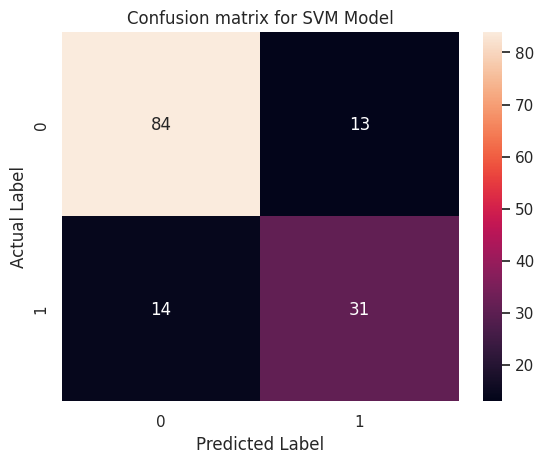

In [47]:
conf_matrix = confusion_matrix(y_test,y_predict_test)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for SVM Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###Training the Model using Logistic Regression

*1*. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [48]:
#  Hyperparameter grid for Logistic Regression
lr_grid_param={
    'C':[0.001,0.1,1,10,100],
    'penalty':['l1','l2']
}

2. Fetching the Best Parameters for Regression Model.





In [49]:
# initialize the logistic regression model
lr_grid_param={
    'C':[0.001,0.1,1,10,100],
    'penalty':['l1','l2']
}
lr_model=LogisticRegression(solver='lbfgs',random_state=0)

#  create gridsearchcv for logistic regression

lr_grid_search=GridSearchCV(lr_model,lr_grid_param, cv=5 , n_jobs=-1)

# Fit the model using LR
lr_grid_search.fit(x_train,y_train)

# get the best hyperparameters
best_lr_params = lr_grid_search.best_params_

print("best grid parameters:", best_lr_params)

#  train logistic with best hyperparameters

best_lr_model=LogisticRegression(solver='lbfgs', random_state=0, **best_lr_params)
best_lr_model.fit(x_train,y_train)

best grid parameters: {'C': 0.1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

LogisticRegression(C=0.1, random_state=0)

##Model Evaluation

#Accuracy Score

> Add blockquote



In [50]:
# Calculate accuracy on the training data for Logistic Regression
y_predict_train = best_lr_model.predict(x_train)
lr_train_accuracy = accuracy_score(y_train, y_predict_train)
print("Logistic Regression Training Accuracy:", lr_train_accuracy)

# Calculate accuracy on the testing data for Logistic Regression
y_predict_test=best_lr_model.predict(x_test)
lr_test_accuracy = accuracy_score(y_test, y_predict_test)
print("Logistic Regression Testing Accuracy:", lr_test_accuracy)

Logistic Regression Training Accuracy: 0.7671957671957672
Logistic Regression Testing Accuracy: 0.8169014084507042


# Confusion Matrix

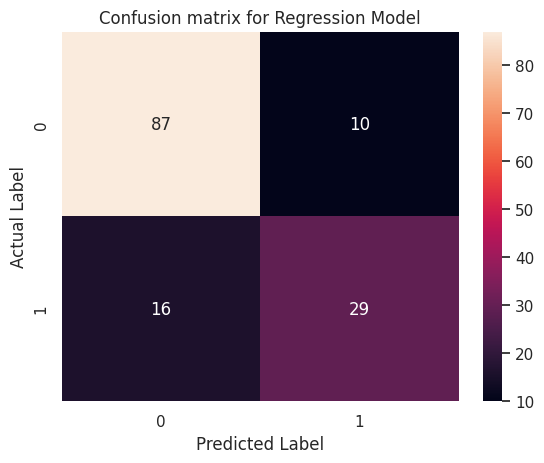

In [51]:
conf_matrix = confusion_matrix(y_test,y_predict_test)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###Training the Model using Decision Tree

*1*. Performing Grid-Search with cross-validation to find the best Parameters for the Model.


In [70]:
tree_params={"max_depth":[2,5,10,20,25,50,100],"criterion":[ "entropy"],"splitter":["best", "random"]}

2. Fetching the Best Parameters forDecision Tree Model.

In [71]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score,precision_score

tr_model=DecisionTreeClassifier()

#  create gridsearchcv for DecisionTree

tr_grid_search=GridSearchCV(tr_model,tree_params, cv=5 , n_jobs=-1)

# Fit the model using LR
tr_grid_search.fit(x_train,y_train)

# get the best hyperparameters
best_tr_params = tr_grid_search.best_params_

print("best grid parameters:", best_tr_params)

#  train model with best hyperparameters

best_tr_model=DecisionTreeClassifier( random_state=2, **best_tr_params)
best_tr_model.fit(x_train,y_train)

best grid parameters: {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=2)

##Model Evaluation


#Accuracy Score


In [72]:
# Calculate accuracy on the training data
tr_train_accuracy = accuracy_score(y_train, y_predict_train)
print("Training Accuracy:", tr_train_accuracy)

# Calculate accuracy on the testing data
y_predict_test=best_tr_model.predict(x_test)
tr_test_accuracy = accuracy_score(y_test, y_predict_test)
print("Testing Accuracy:", tr_test_accuracy)

Training Accuracy: 0.7671957671957672
Testing Accuracy: 0.7887323943661971


# Confusion Matrix


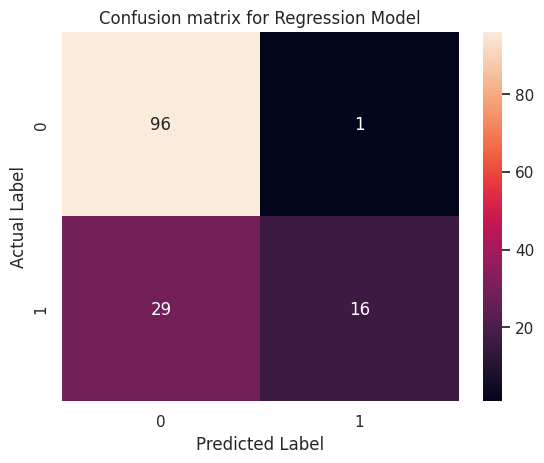

In [74]:
conf_matrix = confusion_matrix(y_test,y_predict_test)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Making a Predictive System


###INPUT 1:

In [52]:
# input data 1
input_data=(2,197,70,45,543,30.5,0.158,53)

In [53]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [54]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [55]:
#standardize the input data
std_data = Sc.transform(input_data_reshaped)
print(std_data)

[[-0.550281    2.64418364 -0.1908367   1.8393103   6.49935095 -0.23822189
  -0.99487771  1.71122075]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
prediction = best_svm_model.predict(std_data)
print(prediction)

[0]


In [57]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')

The Patient is Not Diabetic


*INPUT* 2

In [58]:
#input data 2
input_data2 = (1,189,60,23,846,30.1,0.398,59)

In [59]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

In [60]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [61]:
#standardize the input data
std_data = Sc.transform(input_data_reshaped)
print(std_data)

[[-0.84856023  2.37107674 -1.12075574 -0.69824163 11.4391566  -0.29927802
  -0.21519241  2.22585724]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [95]:
prediction = best_lr_model.predict(std_data)
print(prediction)

[1]


In [96]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')

The Patient is Diabetic


*INPUT* 3


In [91]:
#input data 3
input_data3 = (3,190,66,23,845,30.1,0.400,60)

In [92]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data3)

In [83]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [84]:
#standardize the input data
std_data = Sc.transform(input_data_reshaped)
print(std_data)

[[-0.25200177  2.4052151  -0.56280432 -0.69824163 11.42285361 -0.29927802
  -0.20869503  2.31162998]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [99]:
prediction = best_tr_model.predict(std_data)
print(prediction)

[1]


In [100]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')

The Patient is Diabetic
